In [62]:
import pandas as pd
import numpy as np

# DATA COLLECTION

In [63]:
ss=pd.read_excel(r"C:\Users\Chaitra\Downloads\student_scores - student_scores.xlsx")

In [64]:
ss

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [65]:
ss.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# DATA UNDERSTANDING

In [66]:
ss.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


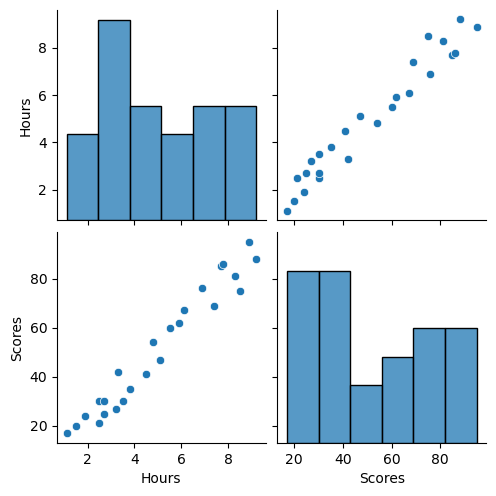

In [67]:
import seaborn as sns
sns.pairplot(ss)

In [68]:
ss.shape

(25, 2)

# SPLIT THE DATA INTO INPUT AND OUTPUT

In [69]:
X = ss.iloc[:,:1]

In [70]:
X.head(2)

,Hours
0,2.5
1,5.1


In [71]:
y = ss.iloc[:,1:]

In [72]:
y.head(2)

,Scores
0,21
1,47


# SPLIT THE DATA INTO TRAINING AND TESTING

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state = 1234)

In [75]:
X_train

,Hours
18,6.1
5,1.5
4,3.5
0,2.5
8,8.3
13,3.3
22,3.8
10,7.7
23,6.9
20,2.7


In [76]:
y_train

,Scores
18,67
5,20
4,30
0,21
8,81
13,42
22,35
10,85
23,76
20,30


# ML TRAINING

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
model.coef_

array([[10.01087641]])

In [81]:
model.intercept_

array([2.09534604])

# ML TESTING 

In [82]:
y_pred=model.predict(X_test)

In [83]:
y_pred

array([[57.15516629],
       [27.12253707],
       [34.13015055],
       [87.18779552],
       [53.15081573]])

In [84]:
y_test

,Scores
7,60
16,30
2,27
3,75
1,47


In [85]:
Y = model.predict(X_train)

# EVALUATE THE MODEL

# TEST ACCURACY

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test, y_pred)

0.8452606709019268

In [88]:
print(len(y_test))  # Output the length of y_test
print(len(Y))       # Output the length of Y

5
20


# TRAIN ACCURACY

In [89]:
r2_score(y_train, Y)

0.9638448409199091

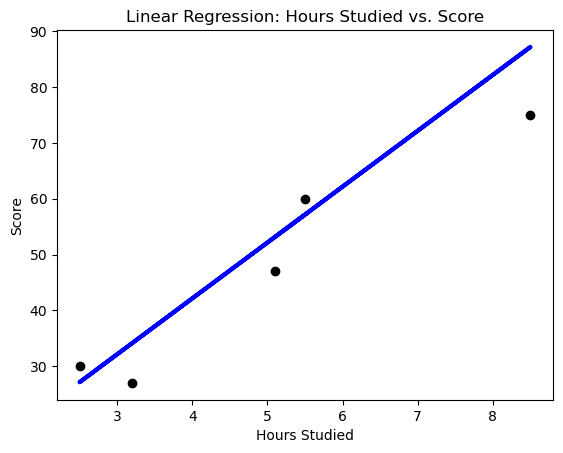

In [90]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue',linewidth=3)
plt.title('Linear Regression: Hours Studied vs. Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [91]:
new_hours = np.array([[9.25]])
new_score = model.predict(new_hours)
print("Predicted Score for 9.25 hours of study per day:", new_score[0])

Predicted Score for 9.25 hours of study per day: [94.69595283]


C:\Users\Chaitra\OneDrive\anaconda1\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
new_hours = np.array([[2.5], [5.1]])
new_scores = model.predict(new_hours)
for i in range(len(new_hours)):
    print(f"Predicted Score for {new_hours[i][0]} hours of study: {new_scores[i]}")

Predicted Score for 2.5 hours of study: [27.12253707]
Predicted Score for 5.1 hours of study: [53.15081573]


C:\Users\Chaitra\OneDrive\anaconda1\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
